In [26]:
#! pip install missingno

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

from sklearn.preprocessing import StandardScaler # Scale 변환 -> 표준화 회귀계수 산출
from sklearn.model_selection import train_test_split
import missingno as msno

In [2]:
path = 'C:/Users/insea/Desktop/study/posco academy/프로젝트/데이터분석/유아용품_데이터/Sales_data.csv'
df_sales = pd.read_csv(path, encoding='utf-8')
df_sales.rename(columns={'구매시월령(수정)':'월령'},inplace=True);
df_sales.head(3)

C:\Users\insea\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,주문번호,구매일,배송시작일,배송완료일,월령,고객번호,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤


In [3]:
path = 'C:/Users/insea/Desktop/study/posco academy/프로젝트/데이터분석/유아용품_데이터/Product_data.csv'
df_products = pd.read_csv(path, encoding='utf-8')
df_products.head(3)

,물품대분류,상품명,물품판매량,제품단가
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0


In [4]:
df_sales.shape

(199999, 10)

# 결측치 처리

In [5]:
df_sales.isnull().sum()

주문번호         0
구매일          0
배송시작일        0
배송완료일        0
월령       31857
고객번호         0
구매금액         0
결제금액         0
물품대분류        0
상품명          0
dtype: int64

# 이상치 처리 

In [4]:
df_sales_num = df_sales.select_dtypes(exclude= 'object' )

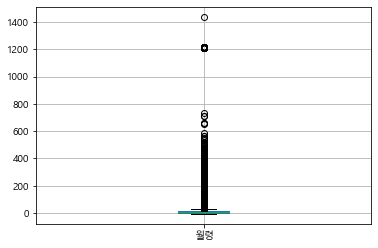

In [5]:
pd.DataFrame(df_sales_num.iloc[:,0]).boxplot();

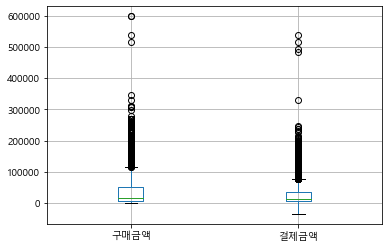

In [6]:
pd.DataFrame(df_sales_num.iloc[:,1:]).boxplot();

In [16]:
# 이상치 제거 
def del_outlier(df,col,w):
    q_1 = df[col].quantile(0.25)
    q_3 = df[col].quantile(0.75)
    IQR = q_3 - q_1
    lower = q_1 - w * IQR
    upper = q_3 + w * IQR
    df[col] = df[col][df[col]>=lower]
    df[col] = df[col][df[col]<=upper]

In [17]:
# PM10, WIND의 이상치 제거
outlier_list=['월령', '구매금액', '결제금액']
for i in outlier_list:
    del_outlier(df_sales,i, 1.5)
df_sales.isnull().sum()

주문번호     0
구매일      0
배송시작일    0
배송완료일    0
월령       0
고객번호     0
구매금액     0
결제금액     0
물품대분류    0
상품명      0
dtype: int64

In [18]:
df_sales.dropna(inplace=True)

<Figure size 720x360 with 0 Axes>

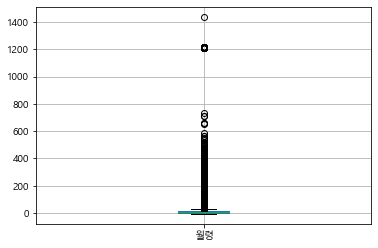

<Figure size 720x360 with 0 Axes>

In [24]:
pd.DataFrame(df_sales_num.iloc[:,0]).boxplot();

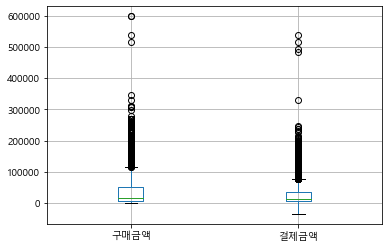

In [20]:
pd.DataFrame(df_sales_num.iloc[:,1:]).boxplot();

In [13]:
# 제거된 이상치 수
df_sales.isnull().sum()

주문번호         0
구매일          0
배송시작일        0
배송완료일        0
월령       52328
고객번호         0
구매금액      4165
결제금액      5374
물품대분류        0
상품명          0
dtype: int64

# 월령 관련 분포 

In [14]:
df_sales

,주문번호,구매일,배송시작일,배송완료일,월령,고객번호,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800.0,16314.0,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200.0,37769.0,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610.0,3800.0,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,NaN,201812310749771,59520.0,47922.0,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640.0,39788.0,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)
...,...,...,...,...,...,...,...,...,...,...
199994,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,20200724113017315991,11700.0,9240.0,FMC,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA)
199995,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000.0,3000.0,체험팩,맘큐 허그박스
199996,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,20200803075905757887,5900.0,5841.0,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA)
199997,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,20200805170229147688,3000.0,3000.0,체험팩,맘큐 허그박스


In [29]:
df_sales.shape

(199999, 10)

In [ ]:
# pd.options.display.max_rows = 60
# pd.options.display.max_columns = 20

In [35]:
df_products['물품중분류'] = np.nan
W_pad = ['좋은느낌']
diaper = ['하기스', '굿나이트']
wet_tissue = ['릴리유', '닥터마밍', '그린핑거', '하기스-물티슈']

# 하기스: 기저귀, 물티슈

,물품대분류,상품명,물품판매량,제품단가,물품중분류
0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0,NaN
1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0,NaN
2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0,NaN
3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0,NaN
4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0,NaN
...,...,...,...,...,...
3043,팬티,하기스 에어솔솔 썸머팬티 6단계 여아용 68매(팬티형),4,47360,NaN
3044,팬티,하기스 에어솔솔 팬티 4단계 남아용 96매(팬티형),18,71040,NaN
3045,팬티,하기스 에어솔솔 팬티 4단계 여아용 96매(팬티형),17,66861,NaN
3046,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),81,68994,NaN


In [45]:
df_products[df_products.물품대분류 == 'FC']
df_products['물품중분류'].loc[:254] = '성인패드'
df_products['물품중분류'].isnull().sum()

C:\Users\insea\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [50]:
df_products[df_products.물품대분류 == '팬티']
df_products['물품중분류'].loc[2664:] = '기저귀'
df_products['물품중분류'].isnull().sum()

C:\Users\insea\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


2409

In [52]:
df_products[df_products.물품대분류 == '물티슈']
df_products['물품중분류'].loc[2498:2575] = '물티슈'
df_products['물품중분류'].isnull().sum()

C:\Users\insea\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


2331

In [28]:
df_products['물품대분류'].value_counts()

기타      1245
더블하트     385
팬티       384
FC       255
FMC      225
기저귀      224
SKC      159
체험팩       89
물티슈       77
SrC        5
Name: 물품대분류, dtype: int64

In [57]:
#  제품 단가 0인 데이터 지우기
df_products.drop(df_products[df_products['제품단가'] == 0].index, inplace=True)

,물품대분류,상품명,물품판매량,제품단가,물품중분류
